# Análisis correlación: Better Life Index vs GDP per capita

## Librerías
Importamos las librerías necesarias.

In [31]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## Carga y preparación de datos
Cargamos los datos y creamos los datasets.

In [32]:
path_data = Path(os.getcwd()) / "data"

print("path_data: ", path_data)

pib = pd.read_csv(path_data / "gdp_per_capita.csv")
vida = pd.read_csv(path_data / "life_satisfaction.csv")

path_data:  /home/jovyan/work/data


Y hacemos una exploración inicial.

In [33]:
pib.info()
pib.head()

vida.info()
vida.head()

<class 'pandas.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Entity              534 non-null    str    
 1   Code                507 non-null    str    
 2   Year                534 non-null    int64  
 3   GDP per capita      534 non-null    float64
 4   900793-annotations  3 non-null      str    
dtypes: float64(1), int64(1), str(3)
memory usage: 21.0 KB
<class 'pandas.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STRUCTURE              42 non-null     str    
 1   STRUCTURE_ID           42 non-null     str    
 2   STRUCTURE_NAME         42 non-null     str    
 3   ACTION                 42 non-null     str    
 4   LOCATION               42 non-null     str    
 5   Country                42 non-null     str  

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,...,OBS_VALUE,Observation Value,OBS_STATUS,Observation Status,UNIT_MEASURE,Unit of Measures,UNIT_MULT,Multiplier,BASE_PER,Base reference period
0,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,EST,Estonia,SW_LIFS,Life satisfaction,L,Value,...,6.5,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN
1,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,GRC,Greece,SW_LIFS,Life satisfaction,L,Value,...,5.8,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN
2,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,DEU,Germany,SW_LIFS,Life satisfaction,L,Value,...,7.3,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN
3,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,FRA,France,SW_LIFS,Life satisfaction,L,Value,...,6.7,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN
4,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,FIN,Finland,SW_LIFS,Life satisfaction,L,Value,...,7.9,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN


Limpiamos nombres de columnas

In [34]:
pib.columns = pib.columns.str.strip()
vida.columns = vida.columns.str.strip()

Renombramos columnas clave

In [35]:
pib = pib.rename(columns={
    "Entity": "Country",
    "GDP per capita, PPP (constant 2021 international $)": "GDP_per_capita"
})

vida = vida.rename(columns={
    "Country": "Country",
    "Life satisfaction": "Life_satisfaction"
})

Filtramos el PIB para relacionarlo con los datos de Índice para una Vida Mejor

In [36]:
ultimo_anio = pib["Year"].max()
pib_reciente = pib[pib["Year"] == ultimo_anio][["Country", "GDP per capita"]].rename(
	columns={"GDP per capita": "GDP_per_capita"}
)

Seleccionamos columnas relevantes del índice

In [37]:
vida_simple = (
	vida.loc[vida["Indicator"].eq("Life satisfaction"), ["Country", "OBS_VALUE"]]
	.rename(columns={"OBS_VALUE": "Life_satisfaction"})
)

Unimos ambos datasets.

In [38]:
df = pd.merge(pib_reciente, vida_simple, on="Country", how="inner")

print(df.head())
print(f"\nFilas combinadas: {len(df)}")

     Country  GDP_per_capita  Life_satisfaction
0  Australia       52049.430                7.1
1    Austria       43792.855                7.2
2    Belgium       41872.395                6.8
3     Brazil       14640.076                6.1
4     Canada       45529.645                7.0

Filas combinadas: 38


## Visualización de los datos


Correlación PIB vs Satisfacción con la vida: 0.745


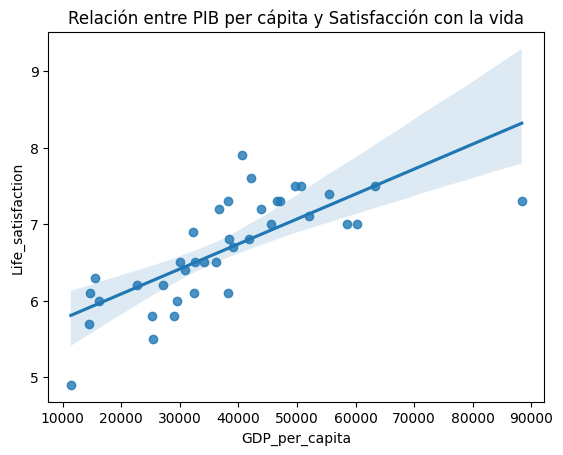

In [39]:
corr = df["GDP_per_capita"].corr(df["Life_satisfaction"])
print(f"\nCorrelación PIB vs Satisfacción con la vida: {corr:.3f}")

sns.regplot(x="GDP_per_capita", y="Life_satisfaction", data=df)
plt.title("Relación entre PIB per cápita y Satisfacción con la vida")
plt.show()